In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from hh import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
df_dict = {}
candidate = ['SOL']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 100.43 %
MDD: 22.00 %
MDD Duration 159 days 21:00:00
worst trade: -18.80 %
2022-02-24 03:00:00 ~ 2022-02-26 07:00:00
avg holding days: 0.85 days
--------------------------------------------
PF: 1.92
Sharpe Ratio: 1.68
Calmar Ratio: 3.46
Sortino Ratio: 2.56
Omega Ratio: 1.13
--------------------------------------------
Expectancy : 0.93 %
Total Time Exposure : 21.92 %
Total Trades: 176
Win Rate: 40.57 %
--------------------------------------------
PF * Win Rate: 0.778


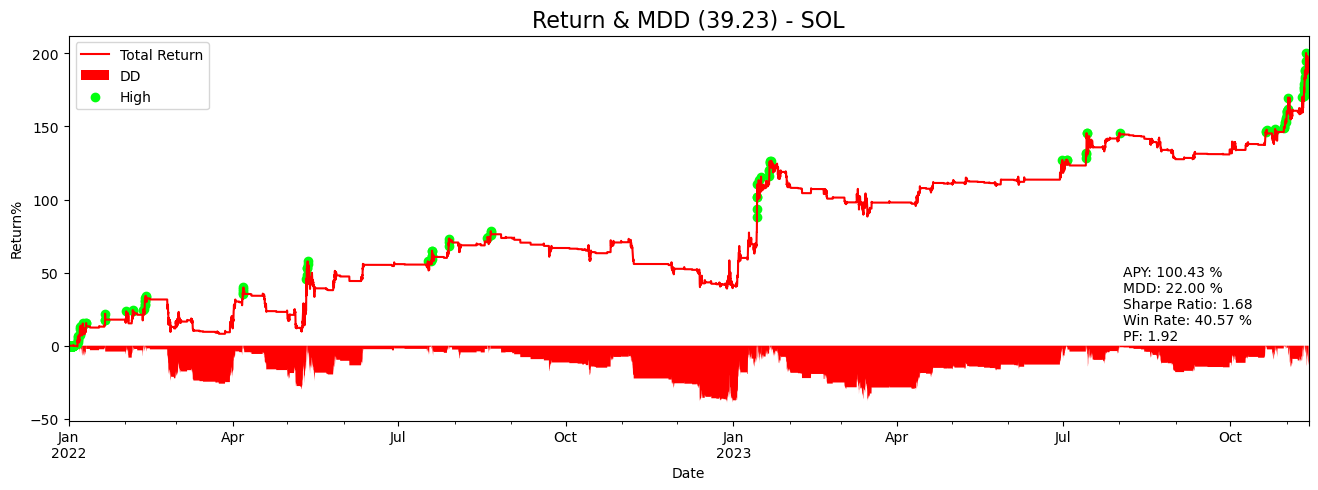

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-13 00:00:00
 Period                                681 days 01:00:00
 Start Value                                     10000.0
 Min Value                                    9947.83964
 Max Value                                  30025.757043
 End Value                                  28738.208163
 Total Return [%]                             187.382082
 Benchmark Return [%]                         -67.334687
 Total Time Exposure [%]                       21.921077
 Max Gross Exposure [%]                       111.717935
 Max Drawdown [%]                              21.995612
 Max Drawdown Duration                 159 days 21:00:00
 Total Orders                                        350
 Total Fees Paid                             1056.090948
 Total Trades                                        176
 Win Rate [%]                                  40.571429
 Best Trade [%]         

In [5]:
start = '2022-01-01'
sep = ''
end = ''

params = {'window_1': 34,
          'window_2': 52}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=[])

======================= SOL BOTH Optimize Test =======================
Optimization trails: 500


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.0s finished


Optimization time: 8.98 sec
---------- SOL BOTH ----------
{'window_1': 34, 'window_2': 52}
APY: 86.47 %
MDD: 22.00 %
MDD Duration 159 days 21:00:00
worst trade: -18.80 %
2022-02-24 03:00:00 ~ 2022-02-26 07:00:00
avg holding days: 0.82 days
--------------------------------------------
PF: 1.83
Sharpe Ratio: 1.56
Calmar Ratio: 3.08
Sortino Ratio: 2.39
Omega Ratio: 1.12
--------------------------------------------
Expectancy : 0.86 %
Total Time Exposure : 21.13 %
Total Trades: 172
Win Rate: 39.77 %
--------------------------------------------
PF * Win Rate: 0.729


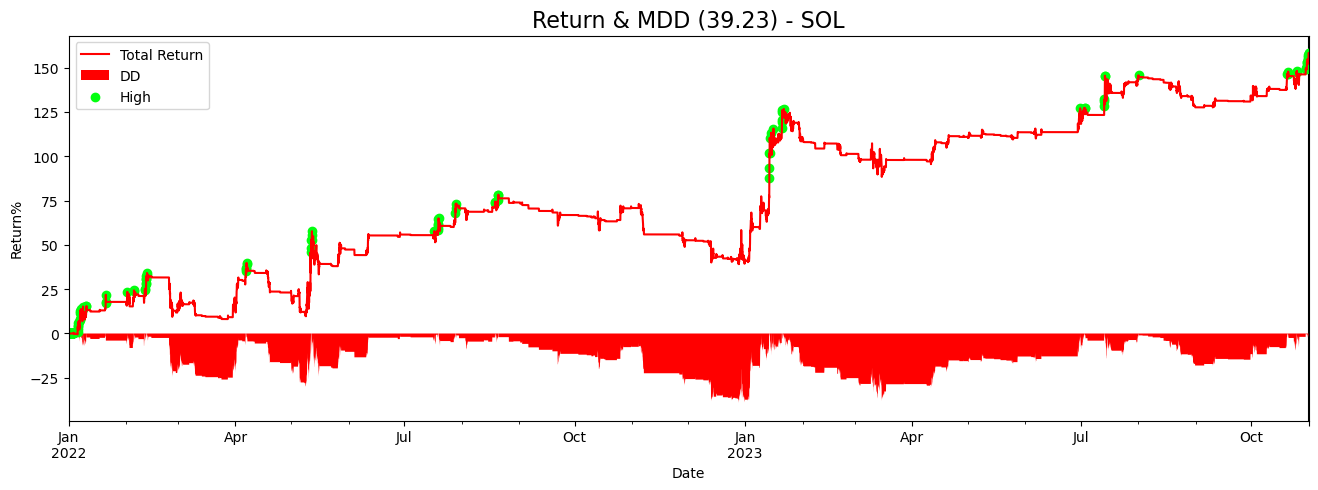

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     30.31 | 6495.04 | -3471.3  |       1.87 |   48.15 |         27 |
| 2022-06    |     25.6  | 5631.64 | -3071.92 |       1.83 |   30    |         20 |
| 2022-09    |     11.03 | 2581.88 | -1479.14 |       1.75 |   42.86 |         21 |
| 2022-12    |    -25.88 | 1042.87 | -3631.29 |       0.29 |   26.67 |         30 |
| 2023-03    |     57.02 | 9062.6  | -3360.17 |       2.7  |   45.45 |         22 |
| 2023-06    |     26.7  | 3209.41 |  -539.45 |       5.95 |   47.62 |         21 |
| 2023-09    |      9.35 | 2891.52 | -1956.76 |       1.48 |   36    |         25 |
| 2023-12    |     24.21 | 2484.48 |   -63.92 |      38.87 |   66.67 |          6 |
+------------+-----------+---------+----------+------------+---------+------------+
{'SOL': {

In [8]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-10-31'

params={
    'window_1' : [10, 50 , 2],
    'window_2' : [30, 80 , 2]
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC','ETH','BNB','ARK','TRB','SOL','MATIC','LINK','DOGE','AVAX','XRP']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(['SOL'],sample_sets,direction='both')
print(all_params)

# trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)
# all_params
